# Clustering K-Nearest Neighbors
#### Adalah proses pengelompokkan yang dilihat dari data paling dekat yang telah ada.

Apakah kamu tahu apa itu K-Nearest Neighbors?
Pernahkah kamu berpikir mengenai pengelompokkan data, yang hasil dari kelompok tersebut dilihat berdasarkan hasil dari data sebelumnya?

Pikirkanlah kamu adalah pegawai baru (menggantikan pegawai sebelumnya yang kini sudah pensiun), pada bidang pendidikan.
Kamu diberikan tugas oleh atasanmu untuk menentukan mahasiswa mendapatkan bantuan beasiswa atau tidak. Adapun beberapa point yang perlu dilihat adalah sebagai berikut:
1. Nilai IPK
2. Tagihan listrik per bulan
3. Jumlah saudara

Kamu tidak diberikan training oleh pegawai sebelumnya. Kamu hanya memiliki data penerima beasiswa tahun lalu yang dibuat oleh pegawai tersebut sebelum pensiun. Data tersebut memuat:
1. Mahasiswa 1, IPK = 3,2, Tagihan listrik/bulan = 120.000, Jumlah saudara = 5, Keterangan = "Menerima Beasiswa"
2. Mahasiswa 2, IPK = 3,0, Tagihan listrik/bulan = 300.000, Jumlah saudara = 2, Keterangan = "Tidak Menerima Beasiswa"
3. Mahasiswa 3, IPK = 4, Tagihan listrik/bulan = 250.000, Jumlah saudara = 5, Keterangan = "Menerima Beasiswa"

Kamu melihat data mahasiwa sekarang dengan:
1. Nilai IPK = 3,5
2. Tagihan listrik per bulan = 200.000
3. Jumlah saudara = 4

Sehingga berdasarkan pertimbangan dari data beasiswa yang diolah oleh pegawai sebelumnya, kamu menyatakan bahwa mahasiswa tersebut "LAYAK MENERIMA BEASISWA".

Clustering K-Nearest Neighbors adalah clustering berdasarkan tetangga terdekat. Kamu melihat data yang sudah ada sebelumnya dan kamu menentukan data sekarang lebih dekat dengan data mana. 
Tetapi bagaimana penerapannya dalam Python? Berikut adalah langkah-langkahnya!

# 1. Penggunaan Data

In [1]:
# menggunakan pandas untuk membaca file csv dan membuat tabel view
import pandas as pd

try:
    df1 = pd.read_csv("Pernikahan.csv", sep=";")
    print("Berhasil membaca file")
    display(df1)
except FileNotFoundError:
    print("Data tidak berhasil dibaca")

Berhasil membaca file


,komunikasi,hubungan sex,tempat tinggal,saling membantu/melayani,peceraian
0,terbuka,tidak pernah,berbeda,False,tidak terjadi
1,terbuka,tidak pernah,berbeda,True,tidak terjadi
2,kadang-kadang,tidak pernah,berbeda,False,terjadi
3,tertutup,jarang,berbeda,False,terjadi
4,tertutup,sering,sama,False,terjadi
5,tertutup,sering,sama,True,terjadi
6,kadang-kadang,sering,sama,True,terjadi
7,terbuka,jarang,berbeda,False,tidak terjadi
8,terbuka,sering,sama,False,terjadi
9,tertutup,jarang,sama,False,terjadi


In [2]:
# inisialisasi/ganti encoding agar sistem dapat membaca data dengan baik
encoding = {"peceraian": {"terjadi":1, "tidak terjadi":0},
           "komunikasi": {"terbuka":1, "tertutup":0, "kadang-kadang":0.5},
           "hubungan sex": {"sering":1, "jarang":0.5, "tidak pernah":0},
           "tempat tinggal": {"sama":1, "berbeda": 0},
           "saling membantu/melayani": {"FALSE":0, "TRUE":1}
           }

df1.replace(encoding, inplace=True)
df1.head()

,komunikasi,hubungan sex,tempat tinggal,saling membantu/melayani,peceraian
0,1.0,0.0,0,False,0
1,1.0,0.0,0,True,0
2,0.5,0.0,0,False,1
3,0.0,0.5,0,False,1
4,0.0,1.0,1,False,1


In [3]:
# gunakan X 
X = df1.drop(["peceraian"], axis=1)
y = df1["peceraian"]
print("DATA X")
display(X)
print("DATA Y")
display(y)

DATA X


,komunikasi,hubungan sex,tempat tinggal,saling membantu/melayani
0,1.0,0.0,0,False
1,1.0,0.0,0,True
2,0.5,0.0,0,False
3,0.0,0.5,0,False
4,0.0,1.0,1,False
5,0.0,1.0,1,True
6,0.5,1.0,1,True
7,1.0,0.5,0,False
8,1.0,1.0,1,False
9,0.0,0.5,1,False


DATA Y


0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: peceraian, dtype: int64

In [4]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [17]:
y_prediksi = knn.predict(X_test)

In [18]:
import sklearn.metrics as met
akurasi = met.accuracy_score(y_test, y_prediksi)

print("Akurasi yang dihasilkan dari pembelajaran adalah:", akurasi)

Akurasi yang dihasilkan dari pembelajaran adalah: 1.0


In [19]:
from sklearn.model_selection import cross_val_score 
import numpy as np

# k_values kita gunakan untuk menentukan berapa titik pada knn = KNeighborsClassifier(n_neighbors=2) yang dianjurkan,
# pada kasus ini kita coba menggunakan dari 1 hingga 2
k_values = [i for i in range (1,2)]

# buat array scores untuk menampung score hasil
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=2)
    scores.append(np.mean(score))
    
print(scores)

[0.7142857142857143]


Text(0, 0.5, 'Accuracy Score')

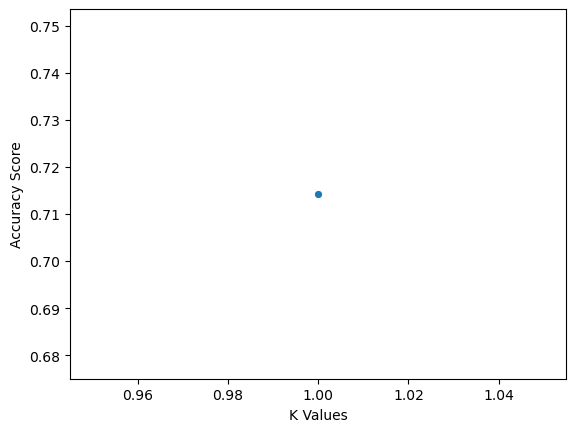

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [21]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test)

accuracy = met.accuracy_score(y_test, y_pred)
precision = met.precision_score(y_test, y_pred, pos_label="Beasiswa")
recall = met.recall_score(y_test, y_pred, pos_label="Beasiswa")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0


C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [26]:
data_baru = pd.DataFrame({
    'komunikasi': [0.5, 1, 1],
    'hubungan sex': [1, 0, 0.5],
    'tempat tinggal':[0, 1, 1],
    'saling membantu/melayani': [1, 0, 0]
})
data_baru_scaled = scaler.fit_transform(data_baru)
hasil_prediksi = knn.predict(data_baru_scaled)

for i, (index, row) in enumerate(data_baru.iterrows()):
    print(f"Keluarga {i+1} dengan data {row.to_dict()}, hasil prediksi = {hasil_prediksi[i]}")
    

Keluarga 1 dengan data {'komunikasi': 0.5, 'hubungan sex': 1.0, 'tempat tinggal': 0.0, 'saling membantu/melayani': 1.0}, hasil prediksi = 1
Keluarga 2 dengan data {'komunikasi': 1.0, 'hubungan sex': 0.0, 'tempat tinggal': 1.0, 'saling membantu/melayani': 0.0}, hasil prediksi = 0
Keluarga 3 dengan data {'komunikasi': 1.0, 'hubungan sex': 0.5, 'tempat tinggal': 1.0, 'saling membantu/melayani': 0.0}, hasil prediksi = 0
